# Исследовательский анализ данных - Бронирование отелей

In [401]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 1. Определение структуры данных

### 1.1 Чтение данных

In [257]:
df = pd.read_csv('dataset/hotel_booking.csv')  
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


Определим размер датасета:

In [258]:
print("Размер датасета: ", df.shape)

Размер датасета:  (119390, 36)


Проверим наличие дубликатов:

In [259]:
df.drop_duplicates(inplace=True, ignore_index=False)
df.shape

(119390, 36)

### 1.2 Описание данных

- Определим, какие данные хранятся в каждом столбце (найдем все уникальные значения)

In [260]:
pd.set_option('display.max_colwidth', 100) # Максимальная ширина столбца

In [261]:
df_unique = pd.DataFrame(columns=['Name', 'Values'])
for col in df:
    if df[col].nunique()<15:
        df_unique = pd.concat([df_unique, pd.DataFrame([[col, df[col].unique()]], columns=['Name', 'Values'])], ignore_index = True )
    else:
        df_unique = pd.concat([df_unique, pd.DataFrame([[col, [df[col].unique()[:3], '...']]], columns=['Name', 'Values'])], ignore_index = True )
df_unique

,Name,Values
0,hotel,"[Resort Hotel, City Hotel]"
1,is_canceled,"[0, 1]"
2,lead_time,"[[342, 737, 7], ...]"
3,arrival_date_year,"[2015, 2016, 2017]"
4,arrival_date_month,"[July, August, September, October, November, December, January, February, March, April, May, June]"
5,arrival_date_week_number,"[[27, 28, 29], ...]"
6,arrival_date_day_of_month,"[[1, 2, 3], ...]"
7,stays_in_weekend_nights,"[[0, 1, 2], ...]"
8,stays_in_week_nights,"[[0, 1, 2], ...]"
9,adults,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


**Произведем анализ для получения представления о данных**

- Добавим столбец с полной датой прибытия:

In [262]:
# Объединим столбцы с годом, месяцем и днем прибытия
df['arrival_date'] = df['arrival_date_year'].astype(str).str.cat( \
    df['arrival_date_month'].str.cat(df['arrival_date_day_of_month'].astype(str), sep =" "), sep =" ") 
# Преобразуем в формат даты
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df[['arrival_date', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].sample(n=5)

,arrival_date,arrival_date_year,arrival_date_month,arrival_date_day_of_month
79004,2015-10-22,2015,October,22
45385,2015-10-28,2015,October,28
16816,2015-09-10,2015,September,10
3135,2015-11-19,2015,November,19
87397,2016-04-16,2016,April,16


- Определим диапазон дат, представленных в наборе данных:

In [263]:
print("Диапазон дат прибытия: ", df['arrival_date'].min(), "-", df['arrival_date'].max())

Диапазон дат прибытия:  2015-07-01 00:00:00 - 2017-08-31 00:00:00


- Определим статусы бронирования, соответстувующие отмене заказа:

In [264]:
print("Подтвержденный заказ: ",df[df['is_canceled']==0]['reservation_status'].unique())
print("Отмененный заказ: ",df[df['is_canceled']==1]['reservation_status'].unique())

Подтвержденный заказ:  ['Check-Out']
Отмененный заказ:  ['Canceled' 'No-Show']


**Теперь мы имеем следующее представление о наборе данных:**

- Содержит 119390 строки; 
- Записи представлены для Resort Hotel и City Hotel;
- Каждое наблюдение представляет бронирование отеля в период с 1 июля 2015 года по 31 августа 2017 года, включая бронирование, которое было отменено.

**hotel** - отель (Resort Hotel или City Hotel);    
**is_canceled** - бронирование отменено (1/0);  
**lead_time** - количество дней, прошедших между датой бронирования и датой прибытия;    
**arrival_date_year** - год прибытия;  
**arrival_date_month** - месяц прибытия;  
**arrival_date_week_number** - номер недели прибытия;  
**arrival_date_day_of_month** - день прибытия;  
**stays_in_weekend_nights** - количество ночей выходных (суббота или воскресенье), в течение которых гость останавливался или забронировал проживание в отеле;  
**stays_in_week_nights** - количество ночей в будни (с понедельника по пятницу), в течение которых гость останавливался или забронировал проживание в отеле;  
**adults** - количество взрослых;  
**children** - количество детей;  
**babies** - количество младенцев;  
**meal** - питание (BB – Bed & Breakfas, SC – Self Catering, ...);  
**country** - cтрана гостя;  
**market_segment** - обозначение сегмента рынка (TA - Travel Agents, TO - Tour Operators);  
**distribution_channel** - канал распространения бронирования;  
**is_repeated_guest** - постоянный гость (1/0);  
**previous_cancellations** - количество предыдущих бронирований, которые были отменены гостем до текущего бронирования;  
**previous_bookings_not_canceled** - количество предыдущих бронирований, не отмененных гостем до текущего бронирования;  
**reserved_room_type** - тип забронированного номера;  
**assigned_room_type** - тип номера, выданного клиенту (иногда назначенный тип номера отличается от забронированного по причинам работы отеля или по запросу клиента);    
**booking_changes** - количество изменений, внесенных в бронирование с момента ввода бронирования до момента регистрации заезда или отмены бронирования;  
**deposit_type** - тип депозита (No Deposit – депозит не внесен, Refundable – внесен депозит в размере стоимости проживания,  Not Refundable – был внесен депозит на сумму, меньшую общей стоимости проживания);  
**agent** - ID туристического агентства, осуществившего бронирование;  
**company** - идентификатор компании, осуществившей бронирование или ответственного за оплату бронирования;  
**days_in_waiting_list** - количество дней, в течение которых бронирование находилось в списке ожидания, прежде чем оно было подтверждено клиенту;  
**customer_type** - тип клиента (Group – бронирование связано с группой, Transient – бронирование не является частью группы или контракта и не связано с другим временным бронированием; Transient-Party - бронирование является временным, но связано, по крайней мере, с другим временным бронированием);  
**adr** - Average Daily Rate (рассчитывается путем деления суммы всех транзакций по размещению на количество ночей проживания);  **required_car_parking_spaces** - количество парковочных мест, требуемых клиентом;  
**total_of_special_requests** - количество специальных запросов, сделанных клиентом;  
**reservation_status** - статус бронирования (Check-Out - клиент зарегистрировался, но уже отбыл, Canceled - бронирование отменено, No-Show - клиент не зарегистрировался и не сообщил отелю причину);   
**reservation_status_date** - дата, на которую был установлен последний статус.

## 2. Выявление аномалий и выбросов

### 2.1 Обработка пропущенных значений

- Получим информацию о типе данных и пропущенных значениях для каждого столбца:

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

Пропущенные значения есть в столбцах "country", "agent", "children", "company". Столбцы "agent", "company" содержат информацию об агенствах и компаниях, их изменять не будем.

- Уберем строки, в которых нет информации о стране

In [266]:
df.dropna(subset = ['country'], inplace = True)

- Заполним пропущенные значения в стобце "children" нулями

In [267]:
df['children'] = df['children'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118902 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118902 non-null  object        
 1   is_canceled                     118902 non-null  int64         
 2   lead_time                       118902 non-null  int64         
 3   arrival_date_year               118902 non-null  int64         
 4   arrival_date_month              118902 non-null  object        
 5   arrival_date_week_number        118902 non-null  int64         
 6   arrival_date_day_of_month       118902 non-null  int64         
 7   stays_in_weekend_nights         118902 non-null  int64         
 8   stays_in_week_nights            118902 non-null  int64         
 9   adults                          118902 non-null  int64         
 10  children                        118902 non-null  float64     

### 2.2 Обработка выбросов 

- Выведем описательную статистику:

In [268]:
df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 
    'days_in_waiting_list', 'adr']].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,118902.0,104.308027,106.903127,0.00,18.0,69.0,161.0,737.0
stays_in_weekend_nights,118902.0,0.928891,0.996211,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118902.0,2.502136,1.900165,0.00,1.0,2.0,3.0,41.0
previous_cancellations,118902.0,0.087139,0.845855,0.00,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,118902.0,0.131629,1.484647,0.00,0.0,0.0,0.0,72.0
booking_changes,118902.0,0.221174,0.652775,0.00,0.0,0.0,0.0,21.0
days_in_waiting_list,118902.0,2.330676,17.630161,0.00,0.0,0.0,0.0,391.0
adr,118902.0,102.000808,50.487004,-6.38,70.0,95.0,126.0,5400.0


- Изучим столбец 'adr';

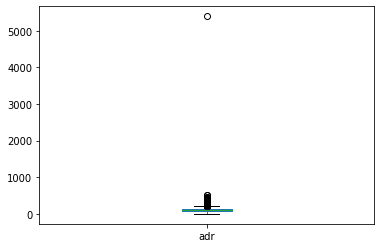

In [269]:
boxplot = df.boxplot(column=['adr'], grid = False)

Уберем значительные выбросы и отрицательные значения ADR:

(118505, 39)

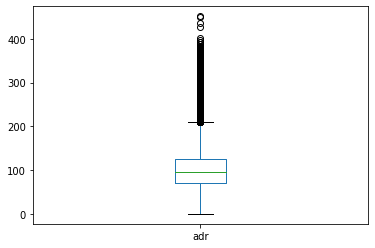

In [323]:
df = df[df['adr']<500] # Удаляем выброс
df = df[df['adr']>= 0]  # Удаляем отрицательные значения
boxplot = df.boxplot(column=['adr'], grid = False)
df.shape

### 2.3 Поиск несоответствий в данных

- Удалим все бронирования, где число взрослых гостей равно 0

In [324]:
df = df[df['adults'] > 0]
df.shape

(118505, 39)

- Удалим бронирования, где статус бронирования не соответствует отметке об отмене бронирования

In [325]:
df = df[~((df['is_canceled'] == 1) & (df['reservation_status'] == 'Check-Out'))]
df = df[~((df['is_canceled'] == 0) & (df['reservation_status'] != 'Check-Out'))]
df.shape

(118505, 39)

## 3. Анализ распределения бронирований между отелями

- Определим, в каком отношении распределяются заказы по отелям (только для посетителей, которые прибыли в отель):

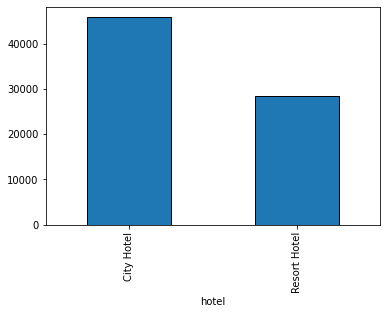

In [578]:
d = df[df['reservation_status']=='Check-Out'].groupby('hotel').hotel.count().plot(kind='bar', edgecolor = 'black')

- Определим зависимость количества гостей от месяца для каждого типа отелей

In [473]:
df['guests'] = df.apply(lambda x: (x["adults"]+x["children"]+x["babies"]), axis=1) # Создадим столбец с общим числом гостей
# Создадим столбец с месяцем прибытия в формате даты
df['arrival_date_month_num'] = pd.to_datetime(df['arrival_date_month'], format = "%B") 

In [475]:
df_visits = df[df['is_canceled']==0]  # Выберем только неотменённые бронирования
df_visits.shape

(74448, 39)

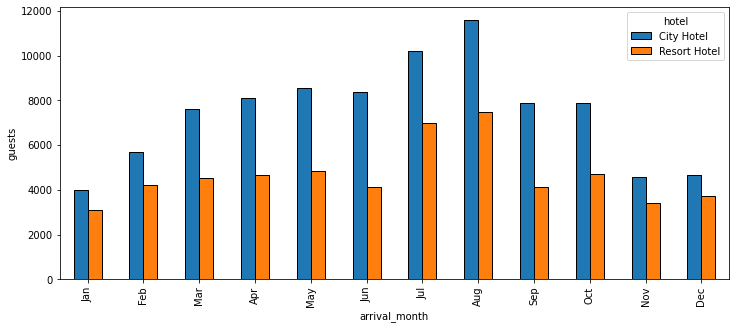

In [476]:
guests_by_month = pd.pivot_table(data=df_visits, index = "arrival_date_month_num",
               columns="hotel", values="guests", aggfunc = "sum").plot(figsize=(12,5), 
               kind = "bar", xlabel="arrival_month", ylabel="guests", edgecolor = 'black')
ax = plt.gca()
xticklabels = ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

## 4. Анализ цен и количества бронирований

- Определим средний ADR за каждый год для каждого отеля:

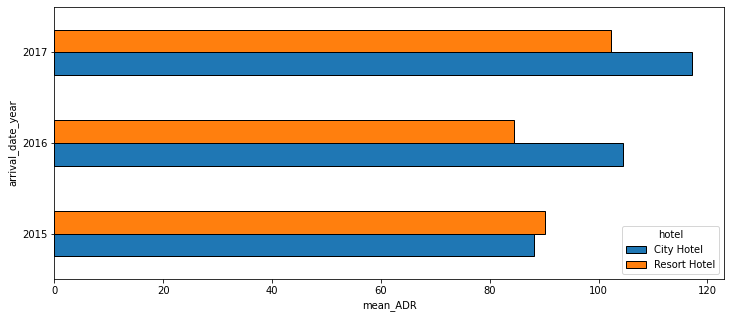

In [383]:
adr_mean = pd.pivot_table(data=df_visits, index = "arrival_date_year",
               columns="hotel",
               values="adr", 
                aggfunc = "mean").plot.barh(figsize=(12,5), xlabel="mean_ADR", edgecolor = 'black')

- Определим зависимость среднего ADR от даты

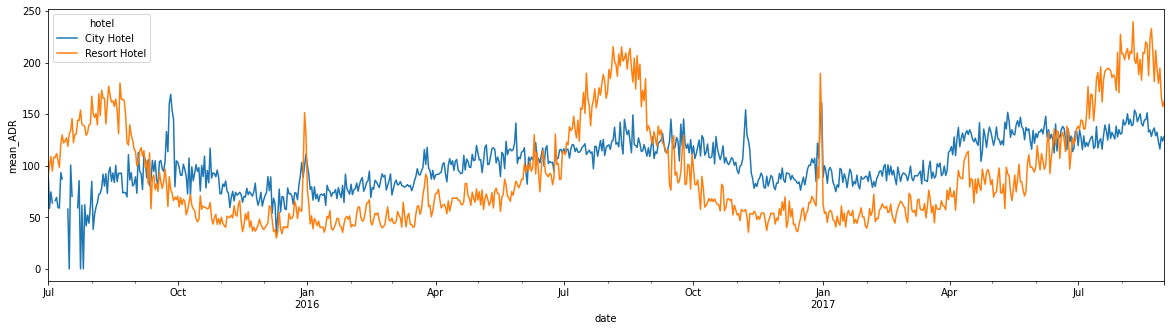

In [382]:
adr_mean = pd.pivot_table(data=df_visits, index = "arrival_date",
               columns="hotel",
               values="adr", 
                aggfunc = "mean").plot(figsize=(20,5), xlabel="date", ylabel="mean_ADR")

Можно заметить, что для Resort Hotel средняя цена имеет выраженную сезонность (цена повышается в летние месяцы и в конце декабря). Для City Hotel цена чуть ниже в зимние месяцы.

- Построим распределение ADR для каждого отеля:

In [461]:
def plot_distribution(arr, title):
    print("Mean ADR: ", arr.mean())
    print("Median ADR: ", arr.median())
    arr.plot(kind='hist', bins=80, figsize=(20, 5),edgecolor = 'black')
    ax = plt.gca()
    ax.axvline(x=arr.mean(),color='red', linestyle='-', label='mean' )
    ax.axvline(x=arr.median(),color='red', linestyle='--', label='median' )
    ax.set_xticks(range(0, int(arr.max()),20))
    plt.title(title, fontsize = 14)
    plt.legend(fontsize = 12)
    plt.show()

Mean ADR:  91.2602371430576
Median ADR:  73.0


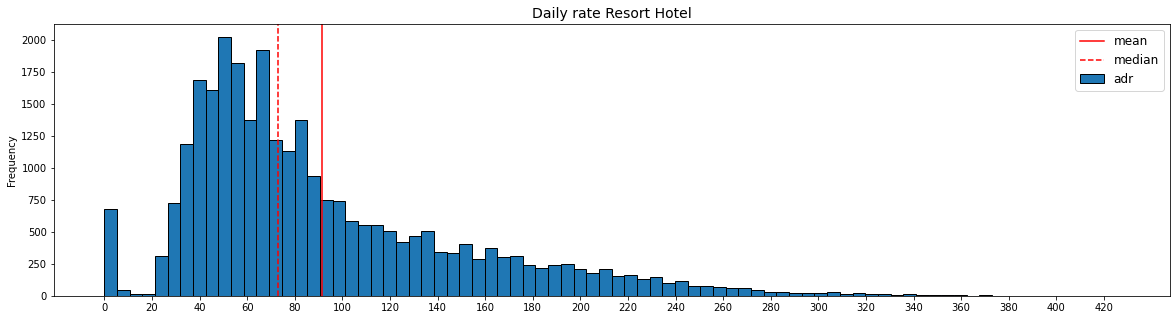

Mean ADR:  106.11064886160811
Median ADR:  100.0


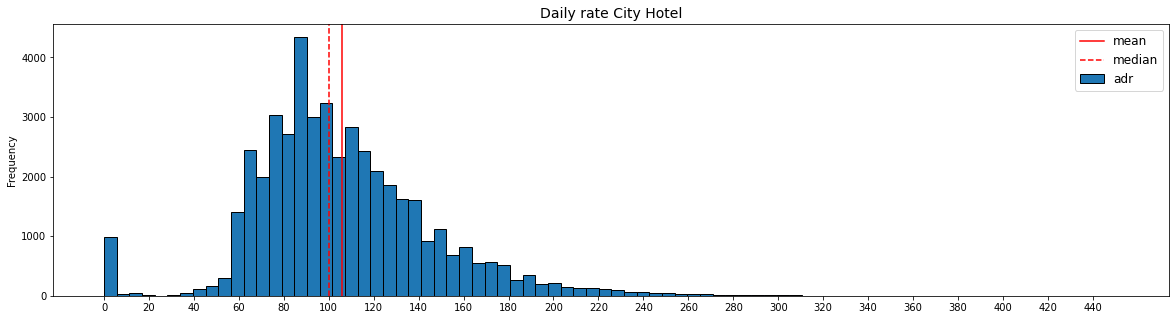

In [527]:
df_visits_RH = df_visits[df_visits.hotel == "Resort Hotel"]
df_visits_CH = df_visits[df_visits.hotel == "City Hotel"]

plot_distribution(df_visits_RH.adr, "Daily rate Resort Hotel")
plot_distribution(df_visits_CH.adr, "Daily rate City Hotel")

Несмотря на сезонные колебания цен в Resort Hotel, средняя цена выше для City Hotel.

- Оценим вклад каждого сегмента рынка в общую прибыль

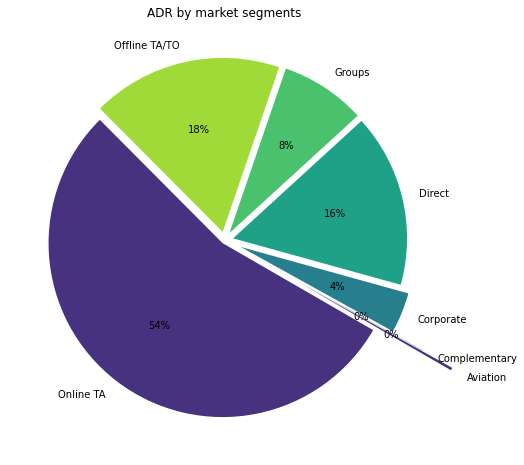

In [577]:
df_market_segment = df_visits.groupby("market_segment").adr.sum().reset_index()
plt.figure(figsize=(8,8))
pieplot = plt.pie(labels = df_market_segment.market_segment, x=df_market_segment.adr, autopct='%1.0f%%', 
                  colors=sns.color_palette('viridis'), startangle=-30, explode=[0.5, 0.3, 0.1, 0.05, 0.05, 0.05, 0.02])
plot_title = plt.title("ADR by market segments")

# plt.legend()
# ax =plt.gca()
# xticklabels = ax.set_xticklabels(df_market_segment.market_segment)

## 5. Анализ отмен бронирования

- Определим долю отмененных и подтвержденных бронирований для каждого отеля

In [658]:
canceled_reserv = df.groupby(["hotel", "is_canceled"]).adr.count().reset_index()
canceled_reserv.rename(columns = {'adr':'reserv'}, inplace = True)
canceled_reserv_sum = canceled_reserv.groupby("hotel").reserv.sum().reset_index()
canceled_reserv_sum.rename(columns = {'reserv':'reserv_sum'}, inplace = True)
canceled_reserv = canceled_reserv.merge(canceled_reserv_sum, on="hotel")
canceled_reserv["perc"] = canceled_reserv.apply(lambda x: (x["reserv"]/x["reserv_sum"] *100), axis=1)
canceled_reserv.set_index('hotel')
canceled_reserv[["hotel", "is_canceled", "perc"]]

,hotel,is_canceled,perc
0,City Hotel,0,58.211905
1,City Hotel,1,41.788095
2,Resort Hotel,0,72.015764
3,Resort Hotel,1,27.984236


- Связь количества дней в списке ожидания и отменой бронирования

In [664]:
waiting_list_canceled = df[df["is_canceled"]==1].groupby("days_in_waiting_list").count()
waiting_list_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,arrival_date,guests,arrival_date_month_num
days_in_waiting_list,,,,,,,,,,,,,,,,,,,,,
0,41698,41698,41698,41698,41698,41698,41698,41698,41698,41698,...,41698,41698,41698,41698,41698,41698,41698,41698,41698,41698
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
4,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
236,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
330,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
